In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/99apo/Untitled Folder 2/input/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
X = df.drop('class', axis=1) #Predictors
# X = df.drop(columns=['class'])
y = df['class'] #Response

In [6]:
from sklearn.preprocessing import LabelEncoder
LE_X = LabelEncoder()
LE_y = LabelEncoder()

In [7]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
y[0:10]

0    p
1    e
2    e
3    p
4    e
5    e
6    e
7    e
8    p
9    e
Name: class, dtype: object

In [9]:
for col in X.columns:
    X[col] = LE_X.fit_transform(X[col])
#     LE.inverse_transform : 역변환!!!
y = LE_y.fit_transform(y)
# LE_y.fit_transform(y) 이것만 해서..바보

In [10]:
X.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1


In [11]:
y
# Poisnous = 1, Eatable = 0

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 0 )

In [14]:
X_train.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
5314,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2075,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5165,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1155,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4448,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train[0]

array([-0.02297586, -0.79559384, -0.33573823, -0.0623232 ,  1.10228717,
       -0.02297586,  1.48134467, -0.81847249, -0.07869939, -0.47562995,
       -0.54930859, -0.62903094, -0.13515353, -0.04598815, -0.04197385,
        2.63464244, -0.38107285,  1.19059523, -0.15888178,  1.67431911,
       -0.22672743, -0.07034732, -0.88046053, -0.18694174, -0.27508469,
       -0.27803239,  0.15829905, -0.44277018, -0.67561447, -0.11164402,
       -0.31288232,  3.13865338, -0.23013684, -0.3816779 , -0.08729296,
       -0.47312627, -0.05635356, -0.25532911, -0.42127124, -0.10151657,
        0.875122  ,  1.07871337, -0.26685813, -0.40757793, -0.15476116,
       -0.64130204, -1.32118642, -0.05476098, -0.62821408,  0.80446322,
       -0.19192297, -0.07034732, -0.11083383, -0.27323081, -0.23725159,
       -0.14931222, -0.54849475,  0.9004599 , -0.03250135, -0.07034732,
       -0.10836869, -0.27434422, -0.25571966, -0.14931222, -0.54930859,
        0.91821121, -0.05790288, -0.10753501,  0.15296447, -0.03

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2개로 차원을 축소하겠다! = feature 갯수
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[ 0.1703247 , -1.44905017],
       [-3.45395265, -2.03829635],
       [-0.57196326, -1.86532101],
       ...,
       [-1.74445025, -1.60939909],
       [-2.0620591 , -0.70698939],
       [-1.23213423, -1.37141018]])

In [19]:
def visualization_train(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Training Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
def visualization_test(model):
    sns.set_context(context='notebook',font_scale=2)
    plt.figure(figsize=(16,9))
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title("%s Test Set" %(model))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [21]:
classifier = Sequential() # Linear stack of layers.

In [22]:
classifier.add(Dense(8, kernel_initializer='uniform', activation='relu', input_dim =2))
classifier.add(Dense(6, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(4, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [23]:
X_train.shape

(5686, 2)

In [24]:
X_test.shape

(2438, 2)

In [25]:
classifier.fit(X_train, y_train, batch_size = 10, epochs=100 )

Epoch 1/100
569/569 [==============================] - 0s 526us/step - loss: 0.5040 - accuracy: 0.7640
Epoch 2/100
569/569 [==============================] - 0s 533us/step - loss: 0.2982 - accuracy: 0.8999
Epoch 3/100
569/569 [==============================] - 0s 503us/step - loss: 0.2903 - accuracy: 0.9013
Epoch 4/100
569/569 [==============================] - 0s 508us/step - loss: 0.2837 - accuracy: 0.9026
Epoch 5/100
569/569 [==============================] - 0s 519us/step - loss: 0.2770 - accuracy: 0.9034
Epoch 6/100
569/569 [==============================] - 0s 515us/step - loss: 0.2709 - accuracy: 0.9040
Epoch 7/100
569/569 [==============================] - 0s 512us/step - loss: 0.2641 - accuracy: 0.9052
Epoch 8/100
569/569 [==============================] - 0s 526us/step - loss: 0.2571 - accuracy: 0.9066
Epoch 9/100
569/569 [==============================] - 0s 506us/step - loss: 0.2504 - accuracy: 0.9071
Epoch 10/100
569/569 [==============================] - 0s 501us/step - l

In [26]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test, y_pred))

[[1222   50]
 [ 101 1065]]


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1272
           1       0.96      0.91      0.93      1166

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



In [29]:
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


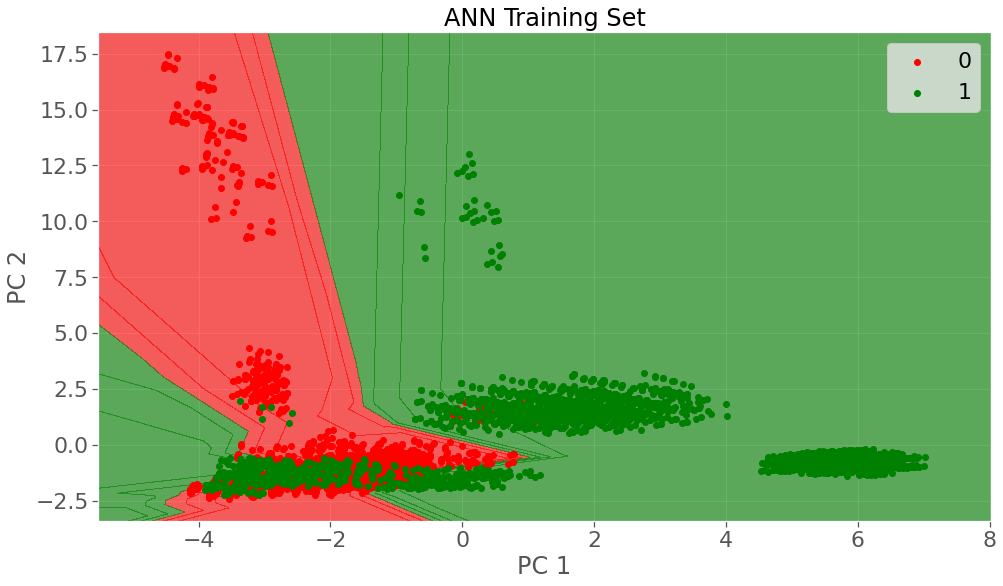

In [31]:
visualization_train(model='ANN')

In [32]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

훈련셋

In [33]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9423

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2936
           1       0.97      0.91      0.94      2750

    accuracy                           0.94      5686
   macro avg       0.94      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686


Confusion Matrix:
[[2852   84]
 [ 244 2506]]

Average Accuracy:	0.9253

Standard Deviation:	0.0072


테스트셋

In [34]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9377

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1272
           1       0.96      0.91      0.93      1166

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438


Confusion Matrix:
[[1225   47]
 [ 105 1061]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


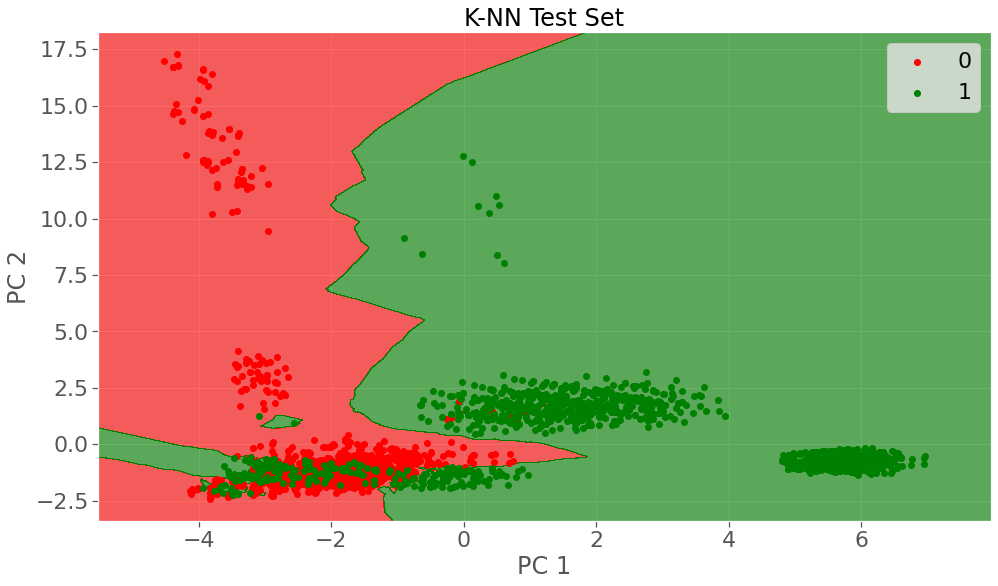

In [35]:
visualization_test('K-NN')

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [37]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9995

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2936
           1       1.00      1.00      1.00      2750

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2936    0]
 [   3 2747]]

Average Accuracy:	0.9233

Standard Deviation:	0.0078


In [38]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9319

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1272
           1       0.95      0.91      0.93      1166

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438


Confusion Matrix:
[[1214   58]
 [ 108 1058]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


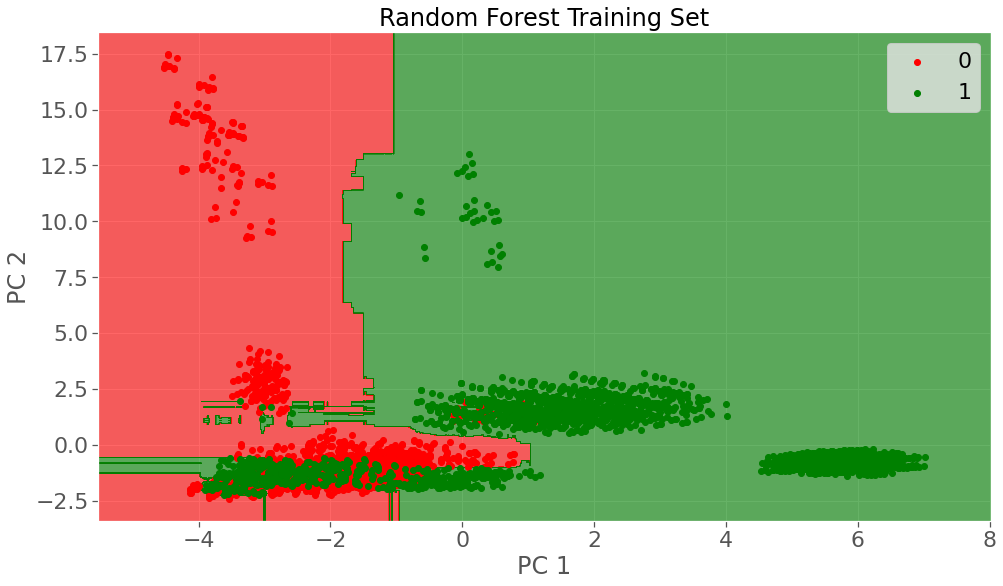

In [39]:
visualization_train('Random Forest')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


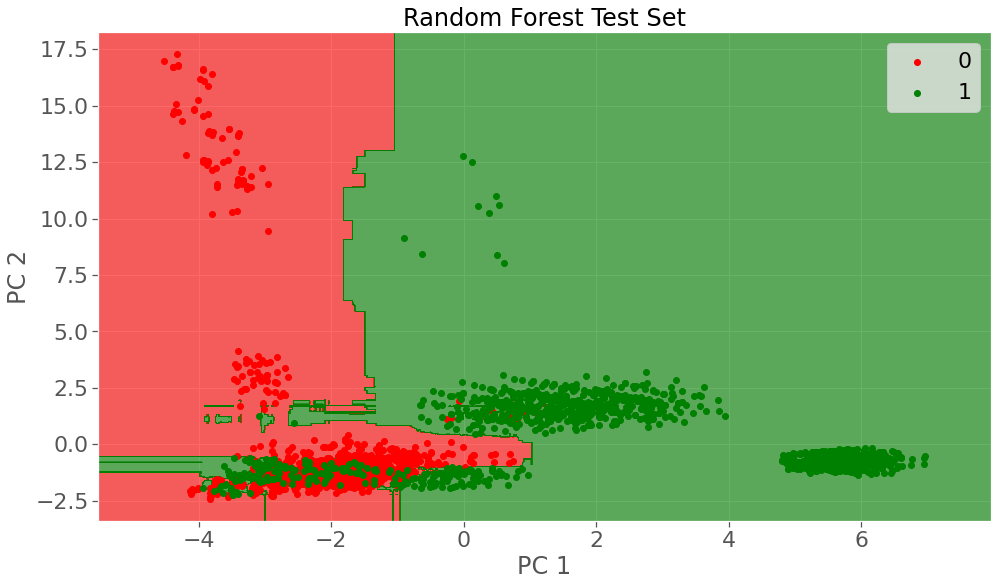

In [40]:
visualization_test('Random Forest')

In [41]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [42]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2936
           1       1.00      1.00      1.00      2750

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2936    0]
 [   0 2750]]

Average Accuracy:	0.8973

Standard Deviation:	0.0083


In [43]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8987

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1272
           1       0.89      0.90      0.90      1166

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438


Confusion Matrix:
[[1136  136]
 [ 111 1055]]



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


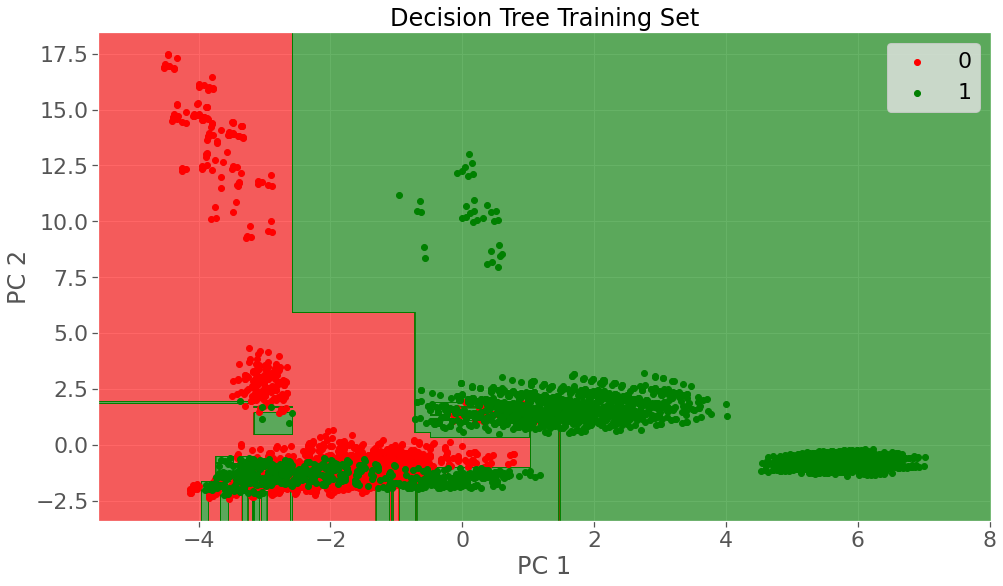

In [44]:
visualization_train('Decision Tree')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


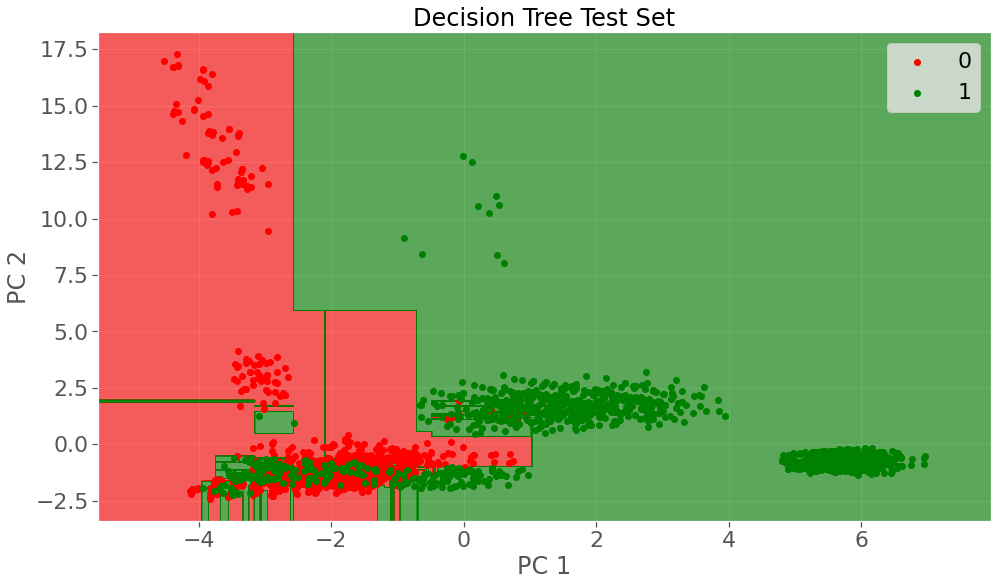

In [45]:
visualization_test('Decision Tree')